In [89]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot
import seaborn as sns

# EDA

In [90]:
df = pd.read_csv('Customer-Churn.csv')
df.info()
#pd.to_numeric(df['TotalCharges'])  'TotalCharges' missing value, fix during data cleaning | Impute
df.loc[df['TotalCharges'] == ' ']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


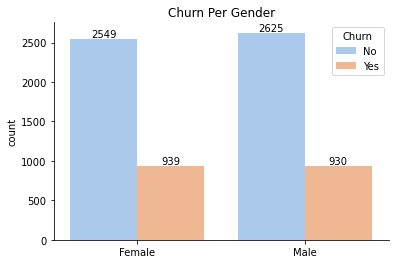

In [91]:
df_per_PID = df.groupby('customerID')[['Churn', 'gender']].first()
# give names to the values in the columns
df_per_PID = df_per_PID.replace({'Gender': {0: 'Male', 1: 'Female'}, 'Sepsis': {'No': 'No sepsis', 'Yes': 'Sepsis'}})
# show counts per Gender and Sepsis
ax = sns.countplot(data=df_per_PID, x='gender', hue='Churn', palette='pastel')
ax.legend(title='Churn') 
ax.set_xlabel('')
for bars in ax.containers:
    ax.bar_label(bars)
# ax.margins(y=0.1)  # make some extra space for the labels
ax.locator_params(axis='y', integer=True)
sns.despine()
plt.title('Churn Per Gender')
plt.show()

There seems to be no difference in the churn rates for males and females, but data seems to have an equal split, not representative of population

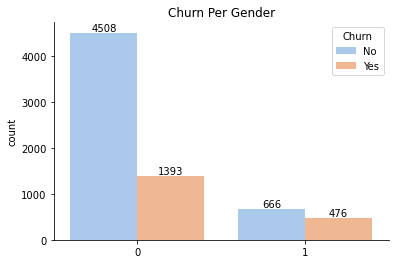

In [92]:
df_per_PID = df.groupby('customerID')[['Churn', 'SeniorCitizen']].first()
# give names to the values in the columns
df_per_PID = df_per_PID.replace({'Gender': {0: 'No', 1: 'Yes'}, 'Sepsis': {'No': 'No sepsis', 'Yes': 'Sepsis'}})
# show counts per Gender and Sepsis
ax = sns.countplot(data=df_per_PID, x='SeniorCitizen', hue='Churn', palette='pastel')
ax.legend(title='Churn') 
ax.set_xlabel('')
for bars in ax.containers:
    ax.bar_label(bars)
# ax.margins(y=0.1)  # make some extra space for the labels
ax.locator_params(axis='y', integer=True)
sns.despine()
plt.title('Churn Per Gender')
plt.show()

It appears that out of the 1342 Senior Citziens 35% of them churned and for non-Senior Citizens 23% of them charned. Perhaps there's a reason Senior Citizens Churn at a higher rate?

### Replacing "Yes", "No" with binary [0,1]

In [93]:
df['Churn'].replace(('Yes', "No"),(1,0),inplace=True)
print(df['Churn'].value_counts())
df.head()

0    5174
1    1869
Name: Churn, dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


### Change 'Senior' Column to 'Yes' 'No' for easier OneHotEncoding

In [94]:
df['SeniorCitizen'].replace((1,0),('Yes', "No"),inplace=True)
print(df['SeniorCitizen'].value_counts())
df.head()

No     5901
Yes    1142
Name: SeniorCitizen, dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


# Data Cleaning

### Separate Customer ID from DF

In [95]:
CustomerId = df['customerID']
CustomerId

0       7590-VHVEG
1       5575-GNVDE
2       3668-QPYBK
3       7795-CFOCW
4       9237-HQITU
           ...    
7038    6840-RESVB
7039    2234-XADUH
7040    4801-JZAZL
7041    8361-LTMKD
7042    3186-AJIEK
Name: customerID, Length: 7043, dtype: object

In [96]:
PredData= df.drop('customerID', axis=1)
PredData

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


# Pipeline

In [97]:
from sklearn.model_selection import train_test_split
X= PredData.drop('Churn',axis=1)
y=PredData['Churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,random_state=42)
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
298,Male,No,Yes,Yes,40,Yes,Yes,DSL,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.55,3015.75
3318,Male,No,No,No,10,No,No phone service,DSL,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,29.50,255.25
5586,Female,No,No,No,27,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.15,501.35
6654,Female,No,Yes,No,7,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,86.50,582.5
5362,Male,No,Yes,Yes,65,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.75,1715.1


In [98]:
X_train.info()
X_train.loc[df['TotalCharges'] == ' ']
#Verifying issue from above still exists

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4718 entries, 298 to 860
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            4718 non-null   object 
 1   SeniorCitizen     4718 non-null   object 
 2   Partner           4718 non-null   object 
 3   Dependents        4718 non-null   object 
 4   tenure            4718 non-null   int64  
 5   PhoneService      4718 non-null   object 
 6   MultipleLines     4718 non-null   object 
 7   InternetService   4718 non-null   object 
 8   OnlineSecurity    4718 non-null   object 
 9   OnlineBackup      4718 non-null   object 
 10  DeviceProtection  4718 non-null   object 
 11  TechSupport       4718 non-null   object 
 12  StreamingTV       4718 non-null   object 
 13  StreamingMovies   4718 non-null   object 
 14  Contract          4718 non-null   object 
 15  PaperlessBilling  4718 non-null   object 
 16  PaymentMethod     4718 non-null   object 

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
3826,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,
5218,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
3331,Male,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,
936,Female,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,
753,Male,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,
4380,Female,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
488,Female,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,
1082,Male,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,


In [99]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Bellow an imputer for 'median' is specified for numeric variables, however a value cannot be imputed by the pipeline for the 'TotalCharges' so it must be done manually.

In [112]:
X_train.loc[df['TotalCharges'] != ' '].median()
median = 1401.000
X_train['TotalCharges'].replace((' '),(median),inplace=True)
X_test['TotalCharges'].replace((' '),(median),inplace=True)

C:\Users\kevin\AppData\Local\Temp\ipykernel_8048\684294107.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  X_train.loc[df['TotalCharges'] != ' '].median()


In [113]:
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('cat_encoder', OneHotEncoder(sparse=False)),
])
cat_attr = ['gender', 'SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
num_attr = ['tenure','MonthlyCharges','TotalCharges']

preprocess_pipeline= ColumnTransformer([
    ('num', num_pipe, num_attr),
    ('cat', cat_pipe, cat_attr),
])
X_train= preprocess_pipeline.fit_transform(X_train[num_attr+cat_attr])


# Initial Model

In [122]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [124]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.781261470365972